# finalexam-part1
23307130428 姚馨悦

In [6]:
# 导入必要的库
import math  # 用于数学计算，特别是math.sqrt()用于计算真实平方根作为参考
import matplotlib.pyplot as plt  # 用于绘图
from adjustText import adjust_text  # 用于自动调整文本标签位置，避免重叠

def babylonian(y, eps, x0=1.0):
    """
    巴比伦算法，用于计算平方根
    
    参数:
        y: 需要计算平方根的数
        eps: 误差阈值，当误差小于eps时停止迭代
        x0: 初始猜测值
    
    返回:
        x: 最终计算得到的平方根近似值
        n: 迭代次数
        errors: 每次迭代后与真实值的误差列表
    
    算法原理: x_{n+1} = (x_n + y/x_n) / 2
    """
    x = x0  # 初始化为初始猜测值
    # xs = [x]  # 可选：保存所有的x值
    errors = [abs(x - math.sqrt(y))]  # 计算初始误差（与真实平方根的差）
    n = 0  # 迭代次数计数器
    
    # 当误差大于等于阈值时继续迭代
    while errors[-1] >= eps:
        x = 0.5*(x + y/x)  # 巴比伦算法迭代公式
        # xs.append(x)  # 可选：保存当前x值
        errors.append(abs(x - math.sqrt(y)))  # 计算当前误差
        n += 1  # 迭代次数加1
        if n > 1000:  # 安全检查：防止无限循环
            break
    return x, n, errors  # 返回最终结果、迭代次数和误差列表



1 [ 0.46355427 -0.50158226]
2 [-0.08987542  0.92556597]
3 [-0.72815727  0.40645548]
4 [0.52714182 0.17396472]
5 [ 0.22084626 -0.40943414]
6 [ 0.14970014 -0.27215689]
7 [-0.55939167  0.10933218]
8 [-0.06740504 -0.72130165]
9 [-0.47521282  0.90019483]
10 [-0.92949131 -0.78696524]
11 [0.24079857 0.95734283]
12 [-0.82079658 -0.91733308]
13 [ 0.9375666  -0.45562493]
14 [ 0.35586266 -0.16101347]


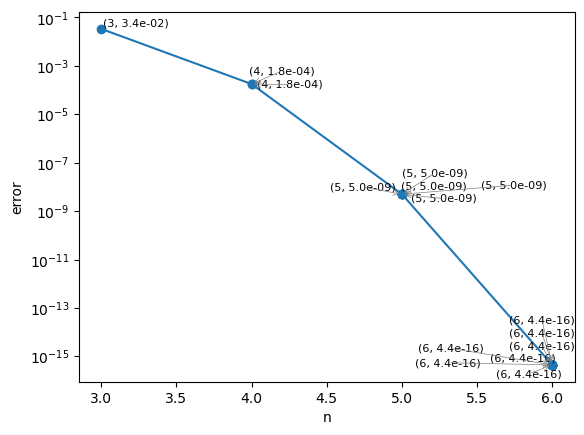

In [7]:
# 实验1：测试不同误差阈值对迭代次数的影响
# 定义不同的误差阈值列表，从10^-1到10^-15
eps_list = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]
y=10  # 计算sqrt(10)
x0=1.0  # 初始猜测值为1.0

# 存储每个eps对应的迭代次数和最终误差
iterations=[]  # 存储迭代次数
final_errors=[]  # 存储最终误差

# 对每个误差阈值运行巴比伦算法
for eps in eps_list:
    x,n,errors = babylonian(y,eps,x0)
    iterations.append(n)  # 记录迭代次数
    final_errors.append(errors[-1])  # 记录最终误差

# 绘制迭代次数与最终误差的关系图
plt.figure()
plt.plot(iterations, final_errors, marker='o')  # 用圆点标记每个数据点

# 为每个数据点添加标签
texts = []
for n, err in zip(iterations, final_errors):
    texts.append(
        plt.text(n, err, f'({n}, {err:.1e})', fontsize=8)  # 显示(迭代次数, 误差)
    )

plt.yscale('log')  # y轴使用对数刻度，便于观察不同数量级的误差
plt.xlabel('n')  # x轴标签：迭代次数
plt.ylabel('error')  # y轴标签：误差

# 自动调整文本标签位置，避免重叠
adjust_text(texts,arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),verbose=0)

plt.show()  # 显示图形


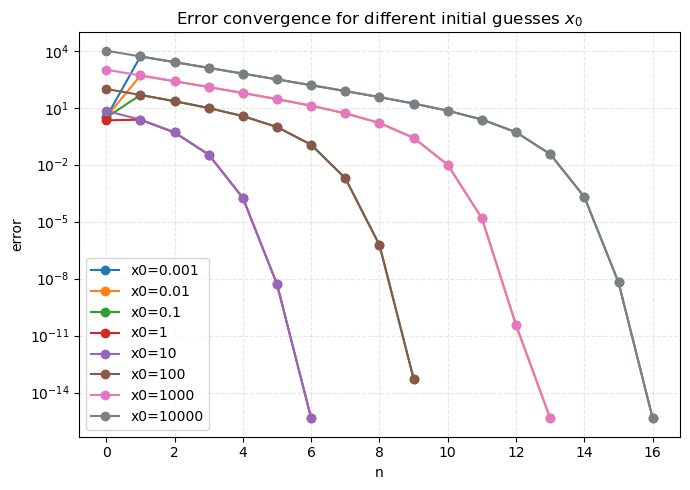

In [8]:
# 实验2：测试不同初始猜测值x0对收敛速度的影响
y = 10  # 计算sqrt(10)
eps = 1e-12  # 固定误差阈值为10^-12
# 定义多个不同的初始猜测值
x0_list = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,10000]

plt.figure(figsize=(7,5))  # 创建图形，设置大小为7x5英寸

# 对每个初始猜测值运行巴比伦算法
for x0 in x0_list:
    x, n, errors = babylonian(y, eps, x0)
    # 使用半对数坐标绘制误差随迭代次数的变化，观察收敛过程
    plt.semilogy(range(n+1), errors, marker='o', label=f'x0={x0:g}')

plt.xlabel('n')  # x轴标签：迭代次数
plt.ylabel('error')  # y轴标签：误差（对数刻度）
plt.title('Error convergence for different initial guesses $x_0$')  # 图标题
plt.grid(True, which='both', ls='--', alpha=0.3)  # 添加网格线，包括主网格和次网格
plt.legend()  # 显示图例，标识不同的x0值
plt.tight_layout()  # 自动调整布局，避免标签被截断
plt.show()  # 显示图形

In [9]:
def babylonian2(y, eps=1e-10, x0=1.0):
    """
    巴比伦算法的另一种实现版本
    
    与babylonian()的区别：
    - 这个版本计算的是相邻两次迭代之间的差值 |x_{n+1} - x_n|
    - 而不是与真实值的差值 |x_n - sqrt(y)|
    
    参数:
        y: 需要计算平方根的数
        eps: 误差阈值，当相邻两次迭代差值小于eps时停止，默认为10^-10
        x0: 初始猜测值，默认为1.0
    
    返回:
        xs: 每次迭代的x值列表
        errors: 相邻两次迭代的差值列表
    """
    x = x0  # 初始化
    xs = [x]  # 保存所有x值
    errors=[]  # 保存相邻迭代间的误差
    n = 0  # 迭代计数器
    
    while True:
        x_new = 0.5*(x + y/x)  # 巴比伦算法迭代公式
        err = abs(x_new - x)  # 计算本次迭代与上次迭代的差值
        xs.append(x_new)  # 保存新的x值
        errors.append(err)  # 保存误差
        x = x_new  # 更新x为新值
        n += 1  # 迭代次数加1
        if err < eps or n > 1000:  # 如果误差足够小或迭代次数过多，则停止
            break
    return xs, errors  # 返回所有x值和误差列表

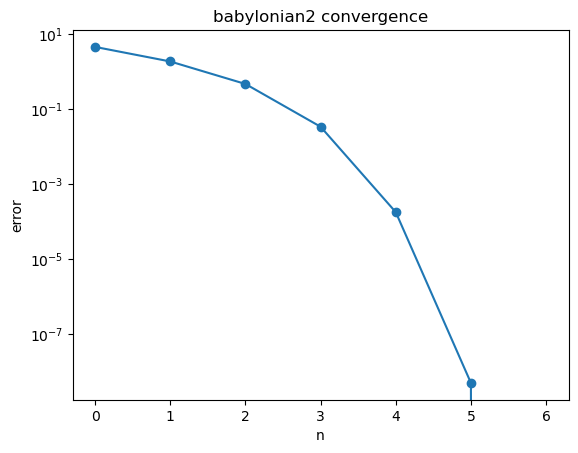

In [10]:
# 实验3：测试babylonian2函数的收敛性
# 使用babylonian2计算sqrt(10)，误差阈值为10^-10，初始值为1.0
xs, errors = babylonian2(10,1e-10,1.0)

# 绘制相邻迭代间误差随迭代次数的变化
plt.figure()
plt.plot(errors, marker='o')  # 用圆点标记每个数据点
plt.yscale('log')  # y轴使用对数刻度
plt.xlabel('n')  # x轴标签：迭代次数
plt.ylabel('error')  # y轴标签：相邻迭代间的误差
plt.title('babylonian2 convergence')  # 图标题：babylonian2的收敛性
plt.show()  # 显示图形
